# Trabalho Final - Programação Genética

IFMG - Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais - Especialização em Inteligência Artificial  

Mat.: Programação Genética 

Prof.: Carlos Alexandre Silva

Aluno: Christhian da S. Gonçalves 

## 01 - Sobre o Conjunto de Dados

O conjunto de dados médicos e demográficos de pacientes, juntamente com seu status de diabetes (positivo ou negativo). Os dados incluem características como idade, sexo, índice de massa corporal (IMC), hipertensão, doenças cardíacas, histórico de tabagismo, nível de HbA1c e nível de glicose no sangue.

Link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## 02 - Análise exploratória dos dados

### 2.1 - Importando Bibliotecas

In [42]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm
from imblearn.over_sampling import SMOTE
from deap import base, creator, tools, algorithms


#permite que os gráficos do Matplotlib sejam exibidos diretamente no notebook
%matplotlib inline
#import warnings #controla o tratamento de avisos (warnings) durante a execução do código
#warnings.filterwarnings("ignore") #ignora avisos durante a execução do código

### 2.2 - Importando base de dados

In [2]:
#Importando dados
df_diabete = pd.read_csv('https://raw.githubusercontent.com/christhiangoncalves/Machine_Learning_Genetic_Programming/main/Diabetes_Dataset/diabetes_prediction_dataset.csv')
df_diabete.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### 2.3 - Analisando dados

In [3]:
#Imformações do tipo dos dados das colunas
df_diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
#Descrição estatistica dos dados
df_diabete.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [5]:
#verificação se existem dados nulos
df_diabete.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
#Verifica numero de linhas duplicadas
df_diabete.duplicated().sum()

3854

In [7]:
#Excluindo 3854 linhas duplicadas
df_diabete.drop_duplicates(inplace=True)

### 2.4 Plotando Gráficos

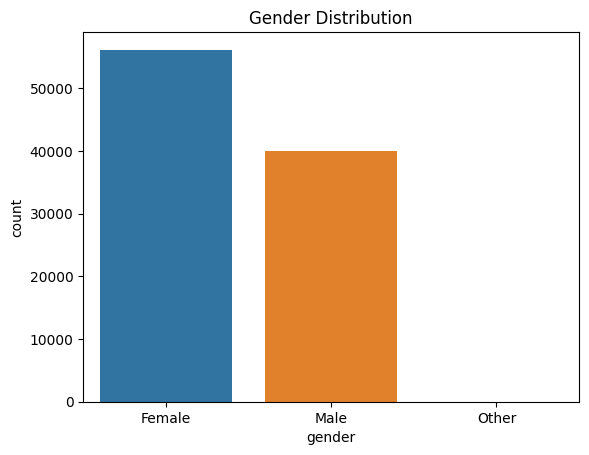

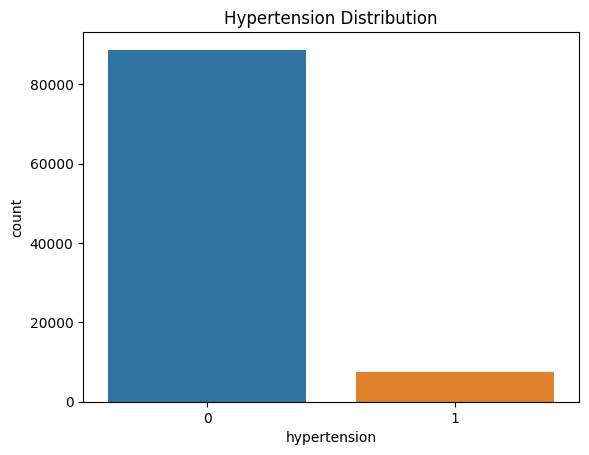

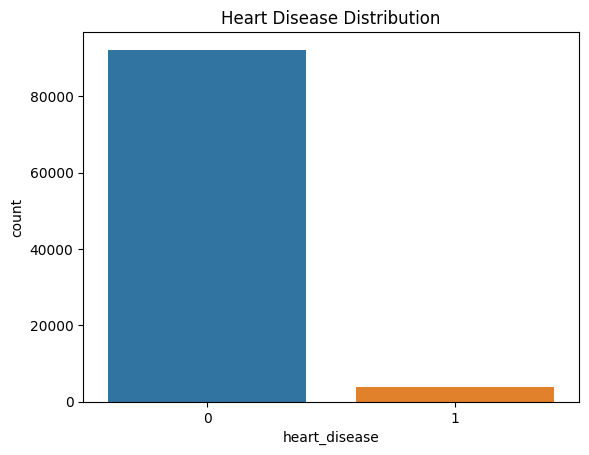

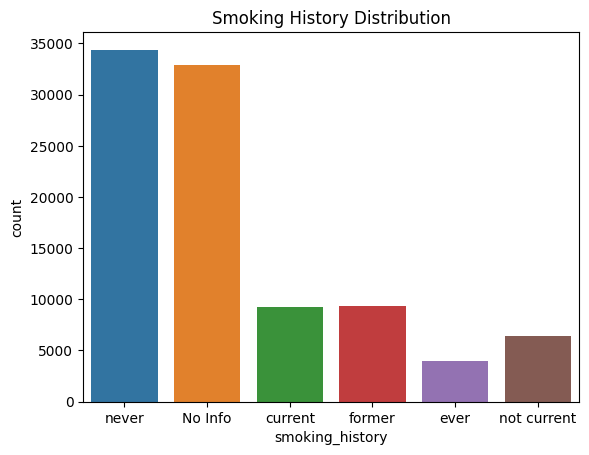

In [8]:
sns.countplot(x="gender", data=df_diabete)
plt.title("Gender Distribution")
plt.show()

sns.countplot(x="hypertension", data=df_diabete)
plt.title("Hypertension Distribution")
plt.show()

sns.countplot(x="heart_disease", data=df_diabete)
plt.title("Heart Disease Distribution")
plt.show()

sns.countplot(x="smoking_history", data=df_diabete)
plt.title("Smoking History Distribution")
plt.show()

In [9]:
#Codificando as colunas do genero e histórico de fumante
le = LabelEncoder()
df_temp = df_diabete.groupby('smoking_history')['smoking_history'].count()
df_diabete["gender_encoded"] = le.fit_transform(df_diabete["gender"])
df_diabete["smoking_history_encoded"] = le.fit_transform(df_diabete["smoking_history"])

#Excluindo colunas "gender" e "smoking_history", pois foi criado colunas codificadas
del df_diabete["smoking_history"]
del df_diabete["gender"]

display(df_temp,df_diabete.groupby('smoking_history_encoded')['smoking_history_encoded'].count())


smoking_history
No Info        32887
current         9197
ever            3998
former          9299
never          34398
not current     6367
Name: smoking_history, dtype: int64

smoking_history_encoded
0    32887
1     9197
2     3998
3     9299
4    34398
5     6367
Name: smoking_history_encoded, dtype: int64

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


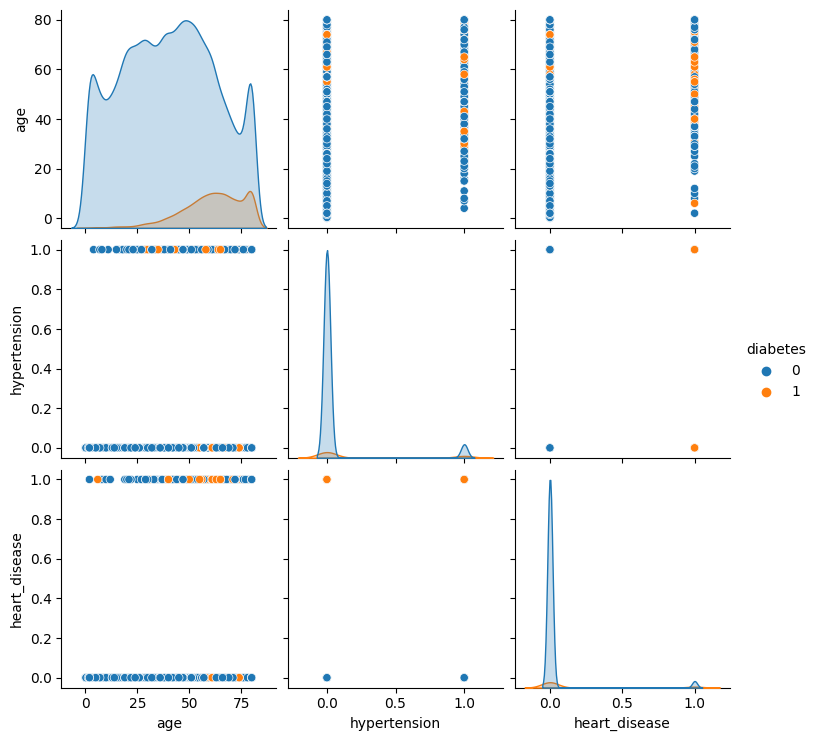

In [10]:
plot1 = ['diabetes','age', 'hypertension','heart_disease']
plot2 = ['diabetes','bmi','HbA1c_level','blood_glucose_level']
plot3 = ['diabetes','gender_encoded','smoking_history_encoded']
sns.pairplot(df_diabete[plot1],hue= 'diabetes')

Pode-se verificar as seguintes relações:
- Quanto maior a idade, maior a frequência de diabetes.
- Quanto maor a idade e possui hipertensão, maoior é a incidência de diabetes.
- Quanto maor a idade e possui doênça do coração, maoior é a incidência de diabetes.

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


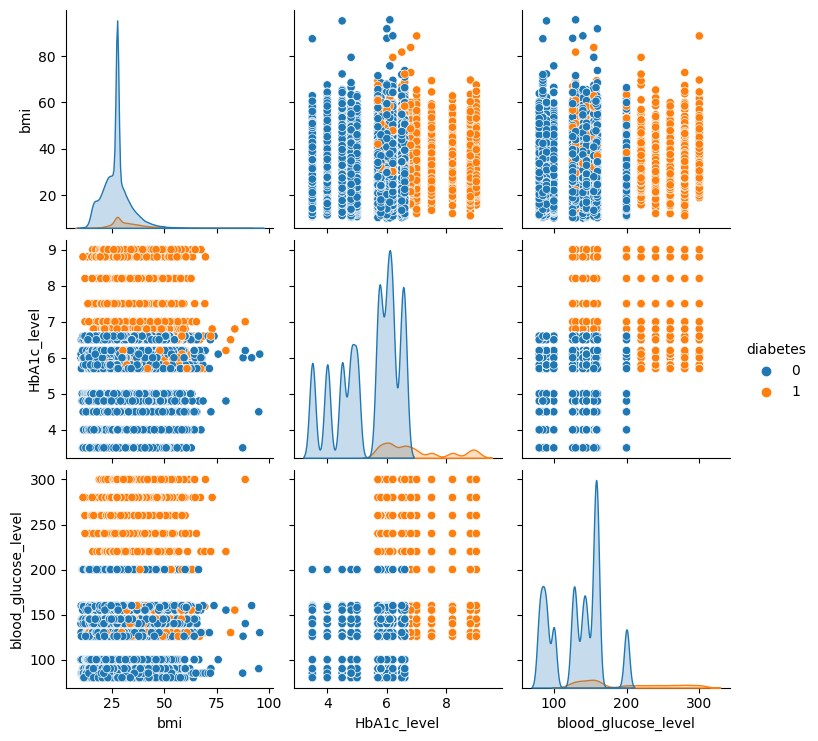

In [11]:
sns.pairplot(df_diabete[plot2],hue= 'diabetes')

É possivel notar uma grande correlação entre os rotulos de dados acima, onde temos:
Quanto maior a glicose e o nível de HbA1C(Hemoglobina Glicada) no sangue maior o indice de diabéticos.
O bmi(indice de massa corporal) não possui uma relação forte com quantidade de diabéticos 

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


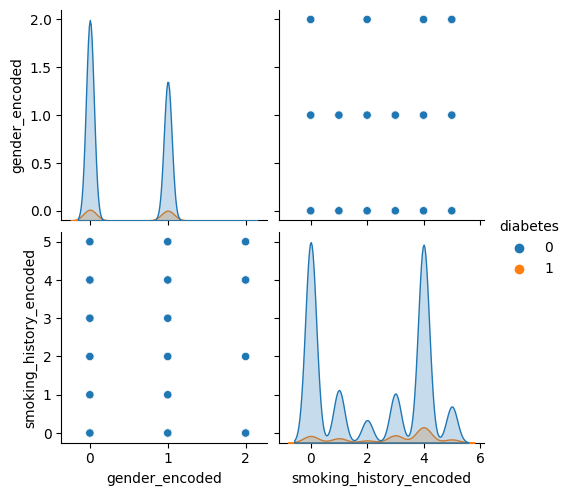

In [12]:
sns.pairplot(df_diabete[plot3],hue= 'diabetes')

Pode-se verificar as seguintes relações:
- Indice de diabetes é independente do genero
- Indice de diabetes é independente se é fumante ou não, porém ocorre um leve aumento de diabétes com os ex fumantes e não fumantes.

Text(0.5, 1.0, 'Correlation Heatmap')

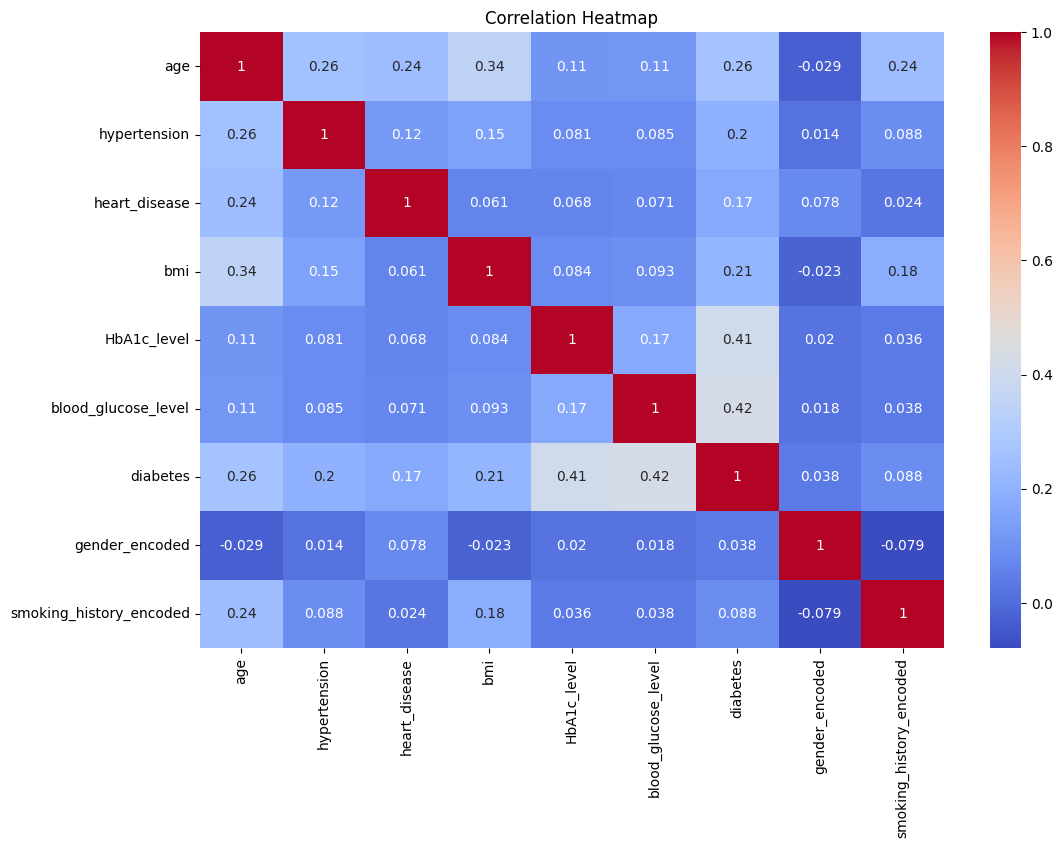

In [13]:
#Mapa de Correlação
plt.figure(figsize=(12,8))
sns.heatmap(df_diabete.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')

# 03 - Modelo de programação genética

### 3.1 - Seleção de Caracteristicas (Features)

Na seleção de caracteristicas é utilizado as funções abaixo para verificar qual o modelo de classificação que melhor se adapta para a classificação dos dados selecionados. O mesmo retorna um score de pontuação que mostra um rank para os modelos listados.

In [14]:
#Definição de funções
classifiers = ['LinearSVM', 'RadialSVM',
               'Logistic',  'RandomForest',
               'AdaBoost',  'DecisionTree',
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def acc_score(df,label):
    Score = pd.DataFrame({"Classificador":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = train_test_split(df, label, test_size=0.25, random_state=42)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1
    Score["Acurácia"] = acc
    Score.sort_values(by="Acurácia", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score


In [15]:
#dividindo base em 2 dataframes
#df_diabete.reset_index(drop=True, inplace=True)
x = df_diabete.drop(['diabetes'],axis=1)
y = df_diabete['diabetes']



print("Dataset de diabetes:\n",df_diabete.shape[0],"Registros\n",df_diabete.shape[1],"Atributos")

Dataset de diabetes:
 96146 Registros
 9 Atributos


In [16]:
#Verificando qual melhor classificador
score = acc_score(x,y)
score

,Classificador,Acurácia
0,GradientBoosting,0.970753
1,AdaBoost,0.970712
2,RandomForest,0.968798
3,LinearSVM,0.957773
4,Logistic,0.957441
5,KNeighbors,0.951491
6,DecisionTree,0.949453
7,RadialSVM,0.945501


In [17]:
#Divide os dataframes x e y em bases de treino e teste. 
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [18]:
# Função para avaliar a aptidão do indivíduo para seleção de características. 
""" A função evaluate() recebe um cromossomo como entrada, seleciona as características com valor "1" no cromossomo e,
em seguida, treina o modelo utilizando apenas esses recursos para realizar a classificação. Por fim, a função retorna a 
pontuação de aptidão do modelo com base nas previsões feitas nos dados de teste. """
def evaluate(individual):
    selected_features = [index for index in range(len(individual)) if individual[index] == 1]
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]
    clf = GradientBoostingClassifier()
    clf.fit(X_train_selected, Y_train)
    y_pred = clf.predict(X_test_selected)
    return accuracy_score(Y_test, y_pred),

In [19]:
# Para remover  as classes FitnessMax e Individual se já estiverem presentes
if 'FitnessMax' in globals():
    del globals()['FitnessMax']
if 'Individual' in globals():
    del globals()['Individual']

In [20]:
#define os componentes necessários para utilizar a biblioteca 'deap' em um algoritmo de programação genética
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) #cria um novo tipo chamado FitnessMax, que herda da classe 'base.Fitness' da biblioteca deap. peso (1.0,), para problema de maximização (maximizar a precisão)
creator.create("Individual", list, fitness=creator.FitnessMax) #cria um novo tipo chamado 'Individual', que é uma lista e terá um atributo fitness do tipo FitnessMax que foi criado anteriormente. cada indivíduo terá uma lista de valores binários representando o cromossomo e um atributo
toolbox = base.Toolbox() #Cria uma instância da classe 'base.Toolbox()' para registrar as funções e operadores que serão usados no algoritmo genético.
toolbox.register("attr_bool", random.randint, 0, 1) #função usada para gerar aleatoriamente valores binários que serão usados para criar os cromossomos dos indivíduos.
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(x.columns)) # criar indivíduos do tipo Individual
toolbox.register("population", tools.initRepeat, list, toolbox.individual) #criar uma população, que é uma lista de indivíduos
toolbox.register("evaluate", evaluate) #Mede a aptidão de cada indivíduo.
toolbox.register("mate", tools.cxTwoPoint) #cruzamento dos indivíduos para a evolução da população.
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05) #Operador inverte aleatoriamente alguns bits nos cromossomos dos indivíduos.
toolbox.register("select", tools.selTournament, tournsize=3) #seleciona indivíduos com base em um torneio entre 3 indivíduos

#Os componentes registrados no toolbox são essenciais para realizar a evolução dos cromossomos e encontrar um conjunto de recursos que maximize a precisão do modelo usando a programação genética.

In [21]:
# Definindo o algoritmo genético e Obtendo o melhor indivíduo
population_size = 25
generations = 5
population = toolbox.population(n = population_size)
for gen in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb = 0.5, mutpb = 0.1)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k = len(population))
population

best_individual = tools.selBest(population, k = 1)[0]
print("Melhor indivíduo:", best_individual)

Melhor indivíduo: [1, 1, 1, 1, 1, 1, 0, 1]


O melhor individuo considera como pouco relevante o atributo gender_encoded (Genero), com isso esse atributo é retirado do modelo de treino e teste.

In [23]:
# Criar uma árvore de decisão com os atributos selecionados pelo indivíduo
selected_features = [index for index in range(len(best_individual)) if best_individual[index] == 1]
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
X_test_selected.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded
2547,5.0,0,0,15.14,4.5,90,0
34774,19.0,0,0,22.74,6.6,85,4
71084,52.0,0,0,24.27,7.5,220,4
50584,55.0,0,0,27.32,5.7,85,0
80788,22.0,0,0,28.78,4.5,200,4


In [24]:
# Treinar o modelo final com osatributos selecionados
clf = GradientBoostingClassifier()
clf.fit(X_train_selected, Y_train)
Y_pred = clf.predict(X_test_selected)
# Nessa parte do código, estamos treinando o modelo final utilizando a árvore de decisão com os atributos selecionados pelos melhores indivíduos encontrados pelo algoritmo genético.
# Com isso, obtemos as previsões do modelo treinado utilizando apenas os atributos selecionados pelo algoritmo genético.

In [ ]:
# Avaliação usando validação cruzada
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X_train_selected, Y_train, cv=5)  # cv define o número de dobras na validação cruzada

# Imprimir os resultados
print("Acurácia média: ", scores.mean())
print("Desvio padrão das acurácias: ", scores.std())

#O objetivo do código fornecido é realizar a avaliação do modelo de árvore de decisão utilizando a técnica de validação cruzada.

Acurácia média:  0.970903313282632
Desvio padrão das acurácias:  0.0005017399782918844


In [28]:
#Matriz de confusão
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)
print("\nRelatório de Classificação:")
print(classification_report(Y_test, Y_pred,zero_division=1)) #zero_division=1 - argumento utilizado para não ocorrer erros caso haja divisao por zero.
tn, fp, fn, tp = conf_matrix.ravel()
fpr = fp / (fp + tn) #Clculo falso positivo
fnr = fn / (fn + tp) #Calculo falso Negativo
print("\nFalso Positivo:")
print(fpr)
print("\nFalso Negativo:")
print(fnr)

Matriz de Confusão:
[[26244    23]
 [  799  1778]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26267
           1       0.99      0.69      0.81      2577

    accuracy                           0.97     28844
   macro avg       0.98      0.84      0.90     28844
weighted avg       0.97      0.97      0.97     28844


Falso Positivo:
0.0008756234057943428

Falso Negativo:
0.3100504462553357


A verificação de falsos positivos e negativos através da matriz de confusão é importante quando o desequilíbrio entre as classes é significativo. É possível verificar, que o modelo tem uma taxa de 31% de falso negativo, que é uma provavel consequência do desbalanceamento dos dados.

In [40]:
# Criando base de treino balanceada
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Aplica o oversampling no conjunto de treino (aumenta a quantidade de exemplos da classe minoritária através de replicação de dados existentes ou geração de dados sintéticos)
X_train_bal, Y_train_bal = smote.fit_resample(X_train, Y_train)

Y_train_bal.reset_index().groupby("diabetes").count()

,index
diabetes,
0,61397
1,61397


In [30]:
# Criar uma árvore de decisão com os atributos selecionados pelo indivíduo selecionado anteriormente
selected_features = [index for index in range(len(best_individual)) if best_individual[index] == 1]
X_train_selected = X_train_bal.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Treinar o modelo final com os melhores indivíduos selecionados anteriormente
clf = GradientBoostingClassifier()
clf.fit(X_train_selected, Y_train_bal)
Y_pred = clf.predict(X_test_selected)

In [35]:
# Avaliação usando validação cruzada
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X_train_selected,Y_train_bal, cv=5)  # cv define o número de dobras na validação cruzada

# Imprimir os resultados
print("Acurácia média: ", scores.mean())
print("Desvio padrão das acurácias: ", scores.std())

Acurácia média:  0.9627832976805564
Desvio padrão das acurácias:  0.026029843226727724


In [37]:
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)
print("\nRelatório de Classificação:")
print(classification_report(Y_test, Y_pred,zero_division=1)) #zero_division=1 - argumento utilizado para não ocorrer erros caso haja divisao por zero.
tn, fp, fn, tp = conf_matrix.ravel()
fpr = fp / (fp + tn) #Clculo falso positivo
fnr = fn / (fn + tp) #Calculo falso Negativo
print("\nFalso Positivo:")
print(fpr)
print("\nFalso Negativo:")
print(fnr)

Matriz de Confusão:
[[25906   361]
 [  663  1914]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     26267
           1       0.84      0.74      0.79      2577

    accuracy                           0.96     28844
   macro avg       0.91      0.86      0.88     28844
weighted avg       0.96      0.96      0.96     28844


Falso Positivo:
0.013743480412685118

Falso Negativo:
0.2572759022118743
